In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
from hydra.utils import instantiate
from hydra import initialize, compose
import hydra

import wandb

from data.dataManager import DataManager
from model.modelCreator import ModelCreator
from omegaconf import OmegaConf
from scripts.run import setup_model, load_model_instance

from utils.plots import vae_plots
from utils.rbm_plots import plot_rbm_histogram

In [4]:
hydra.core.global_hydra.GlobalHydra.instance().clear()
initialize(version_base=None, config_path="config")
config=compose(config_name="config.yaml")
wandb.init(tags = [config.data.dataset_name], project=config.wandb.project, entity=config.wandb.entity, config=OmegaConf.to_container(config, resolve=True), mode='offline')

wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [5]:
new_model = True
if new_model:
    self = setup_model(config)
    # self.model = self.model.double()  # sets all model parameters to float64
else:
    self = load_model_instance(config.config_path)
    # self.model = self.model.double()


[18:47:16.050] INFO   data.dataManager                                  Keys: ['incident_energies', 'showers']


[18:47:18.312] INFO   data.dataManager                                  dict_keys(['incident_energies', 'showers'])
[18:47:18.315] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f6b01d22c90>: 101815 events, 199 batches
[18:47:18.315] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f68780de630>: 12728 events, 13 batches
[18:47:18.316] INFO   data.dataManager                                  <torch.utils.data.dataloader.DataLoader object at 0x7f68780dd820>: 12726 events, 13 batches
[18:47:18.316] INFO   model.modelCreator                                ::Creating Model
[18:47:18.535] WARN   model.rbm.zephyr                                  QPU is offline. Setting a hard-coded zephyr. Check to see you're pinging the correct chip_id


/home/jtoledo/CaloQuVAE


[18:47:18.970] INFO   scripts.run                                       Requesting GPUs. GPU list :[1]
[18:47:18.971] INFO   scripts.run                                       Main GPU : cuda:1
[18:47:19.132] INFO   scripts.run                                       CUDA available


cuda:1
encoder._networks.0.seq1.0.conv.weight True
encoder._networks.0.seq1.0.conv.bias True
encoder._networks.0.seq1.1.weight True
encoder._networks.0.seq1.1.bias True
encoder._networks.0.seq1.2.weight True
encoder._networks.0.seq1.3.conv.weight True
encoder._networks.0.seq1.3.conv.bias True
encoder._networks.0.seq1.4.weight True
encoder._networks.0.seq1.4.bias True
encoder._networks.0.seq1.5.weight True
encoder._networks.0.seq2.0.conv.weight True
encoder._networks.0.seq2.0.conv.bias True
encoder._networks.0.seq2.1.weight True
encoder._networks.0.seq2.1.bias True
encoder._networks.0.seq2.2.weight True
encoder._networks.0.seq2.3.conv.weight True
encoder._networks.0.seq2.3.conv.bias True
encoder._networks.0.seq2.4.weight True
encoder._networks.1.seq1.0.conv.weight True
encoder._networks.1.seq1.0.conv.bias True
encoder._networks.1.seq1.1.weight True
encoder._networks.1.seq1.1.bias True
encoder._networks.1.seq1.2.weight True
encoder._networks.1.seq1.3.conv.weight True
encoder._networks.1.

[19:00:41.430] INFO   engine.engine                                     Epoch: 0 [0/13 (0%)]	 Batch Loss: 57311.0234


Max value: 5821889.5, Min value: 0.19096742570400238
Max value: 1.055808663368225, Min value: 1.6007455997169018e-05
Max value: 0.8805271983146667, Min value: 0.23681972920894623
No data in energy range 181.0 - 362.0 GeV, skipping this bin.
No data in energy range 362.0 - 724.1 GeV, skipping this bin.
No data in energy range 724.1 - 1448.2 GeV, skipping this bin.
No data in energy range 1448.2 - 2896.3 GeV, skipping this bin.
No data in energy range 2896.3 - 5792.6 GeV, skipping this bin.
No data in energy range 5792.6 - 11585.2 GeV, skipping this bin.
Max value: 23613.37890625, Min value: 0.19096742570400238
Max value: 1.055808663368225, Min value: 1.611678635526914e-05
Max value: 0.8805271983146667, Min value: 0.48341837525367737
Max value: 47376.7734375, Min value: 0.39137744903564453
Max value: 1.0365310907363892, Min value: 1.615424480405636e-05
Max value: 0.8605442047119141, Min value: 0.4791666567325592
Max value: 91897.8984375, Min value: 0.7710563540458679
Max value: 1.0195116

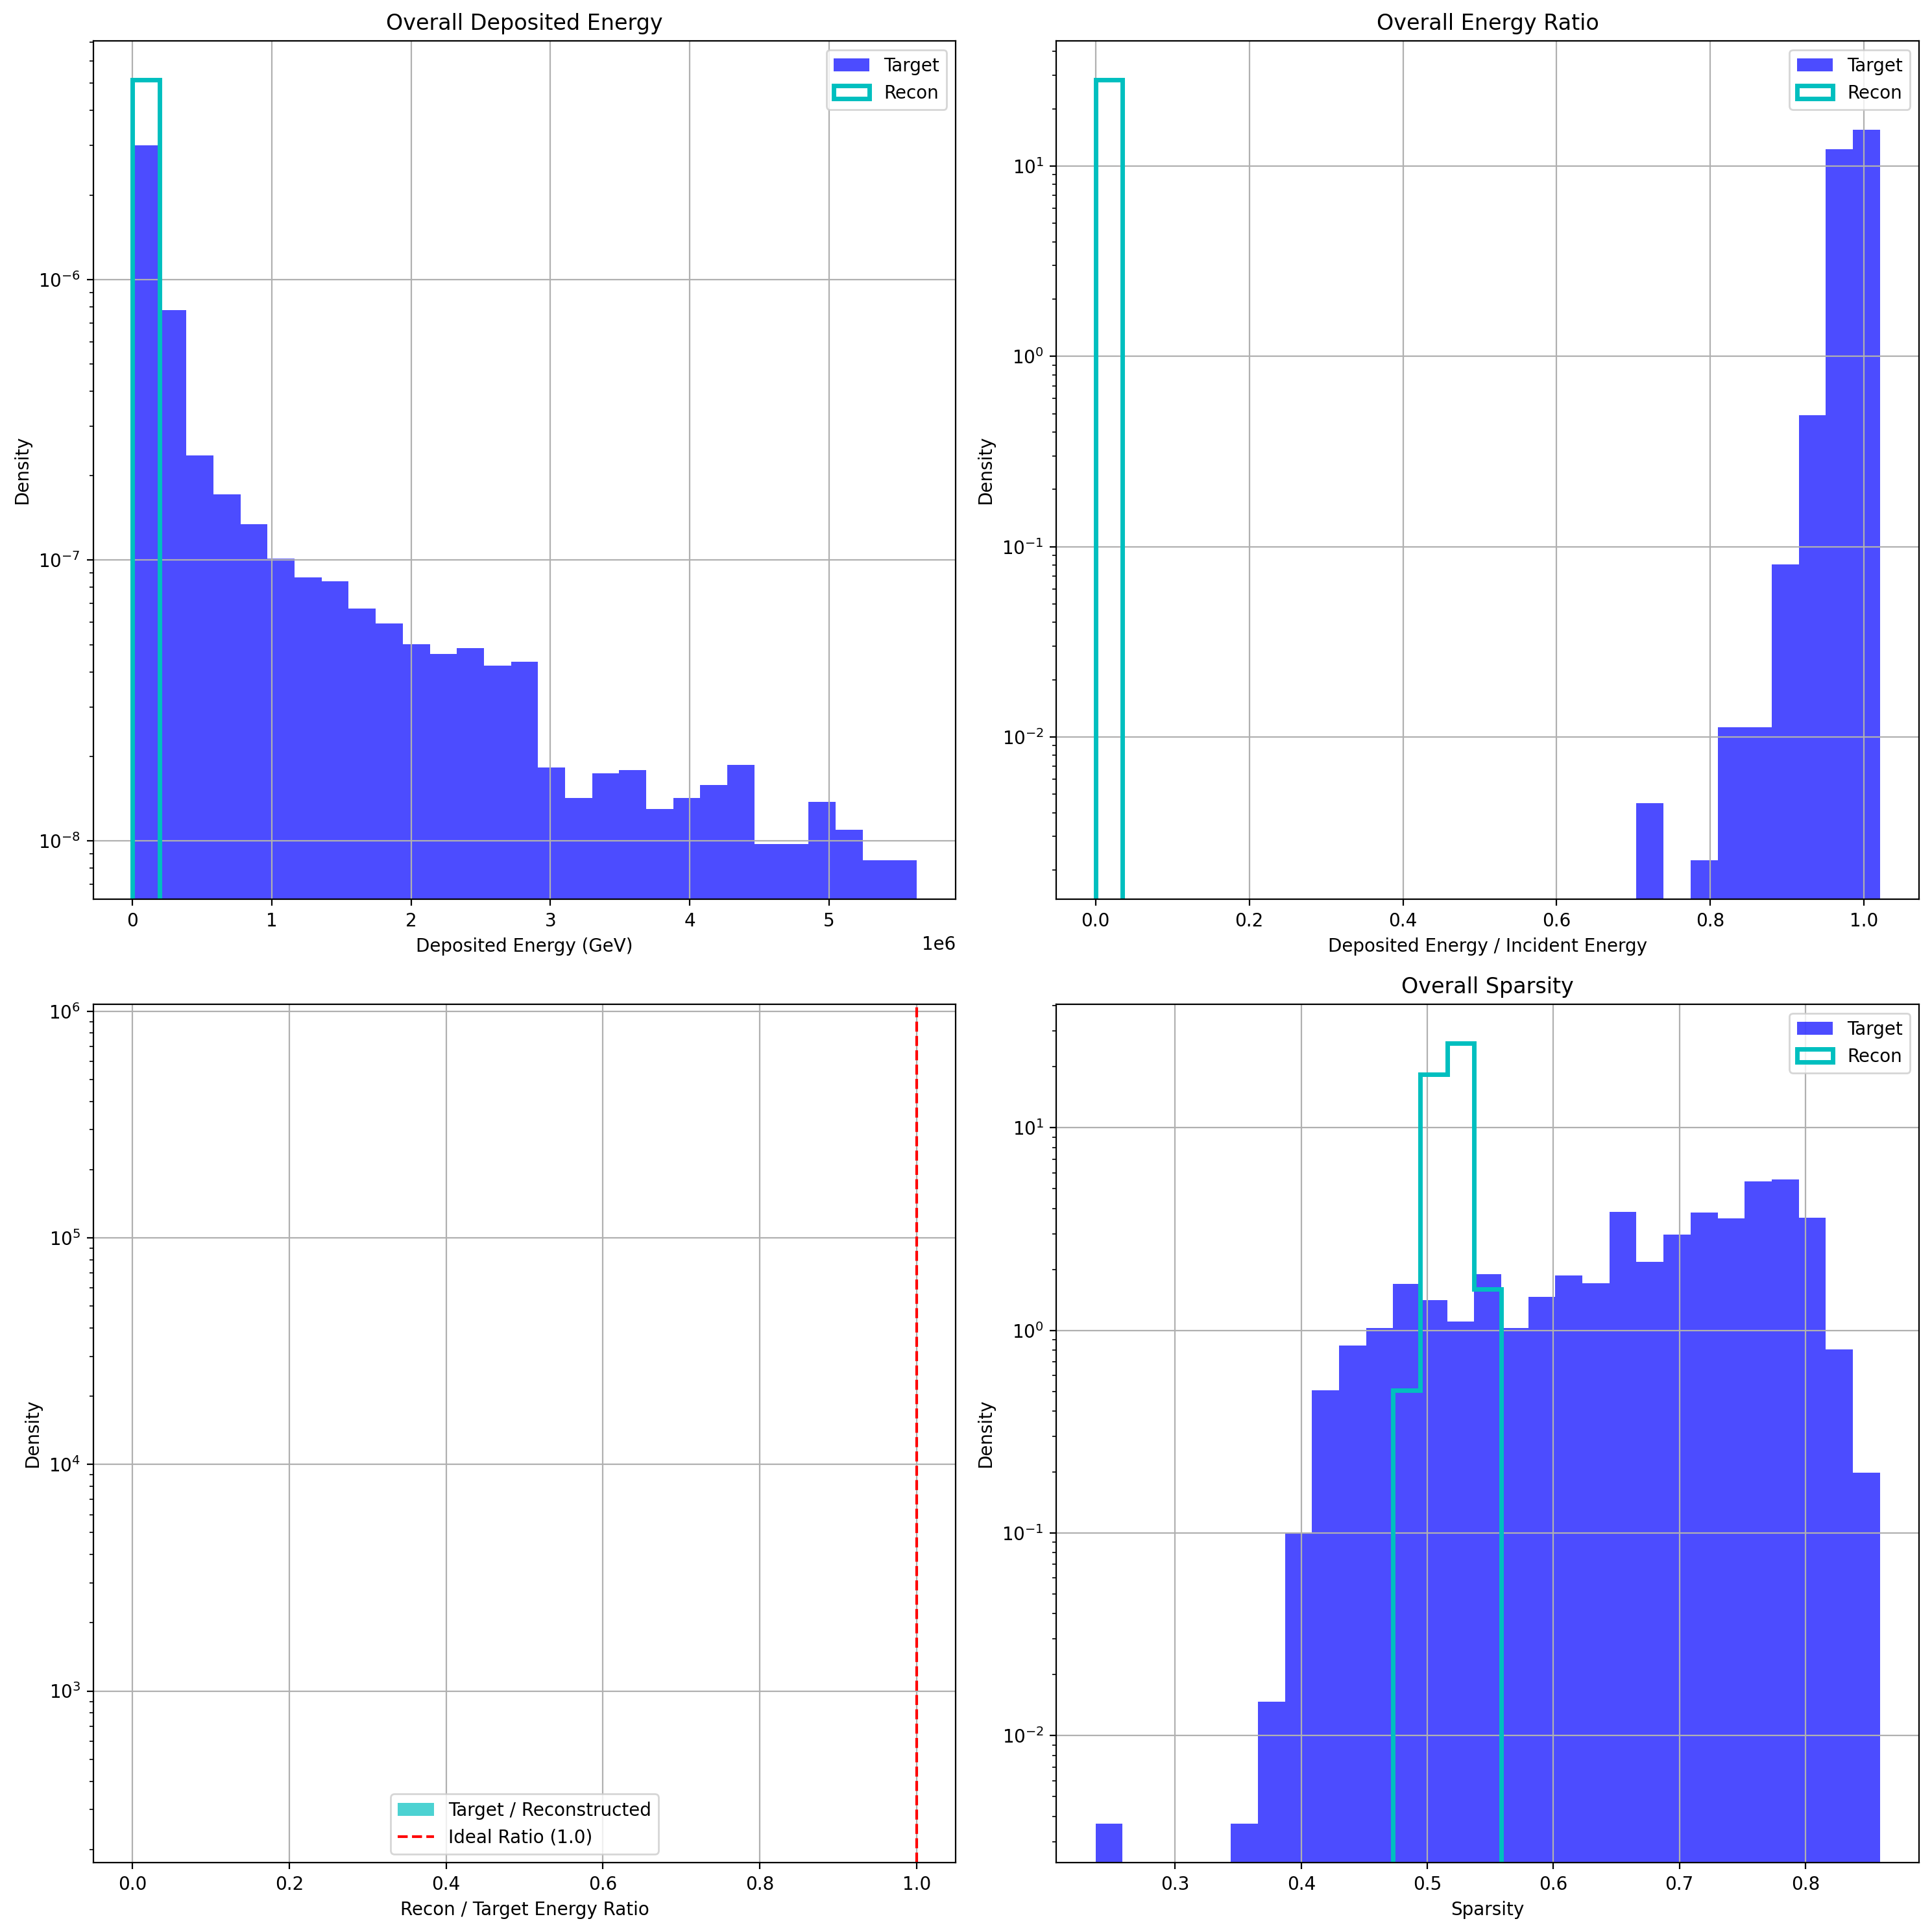

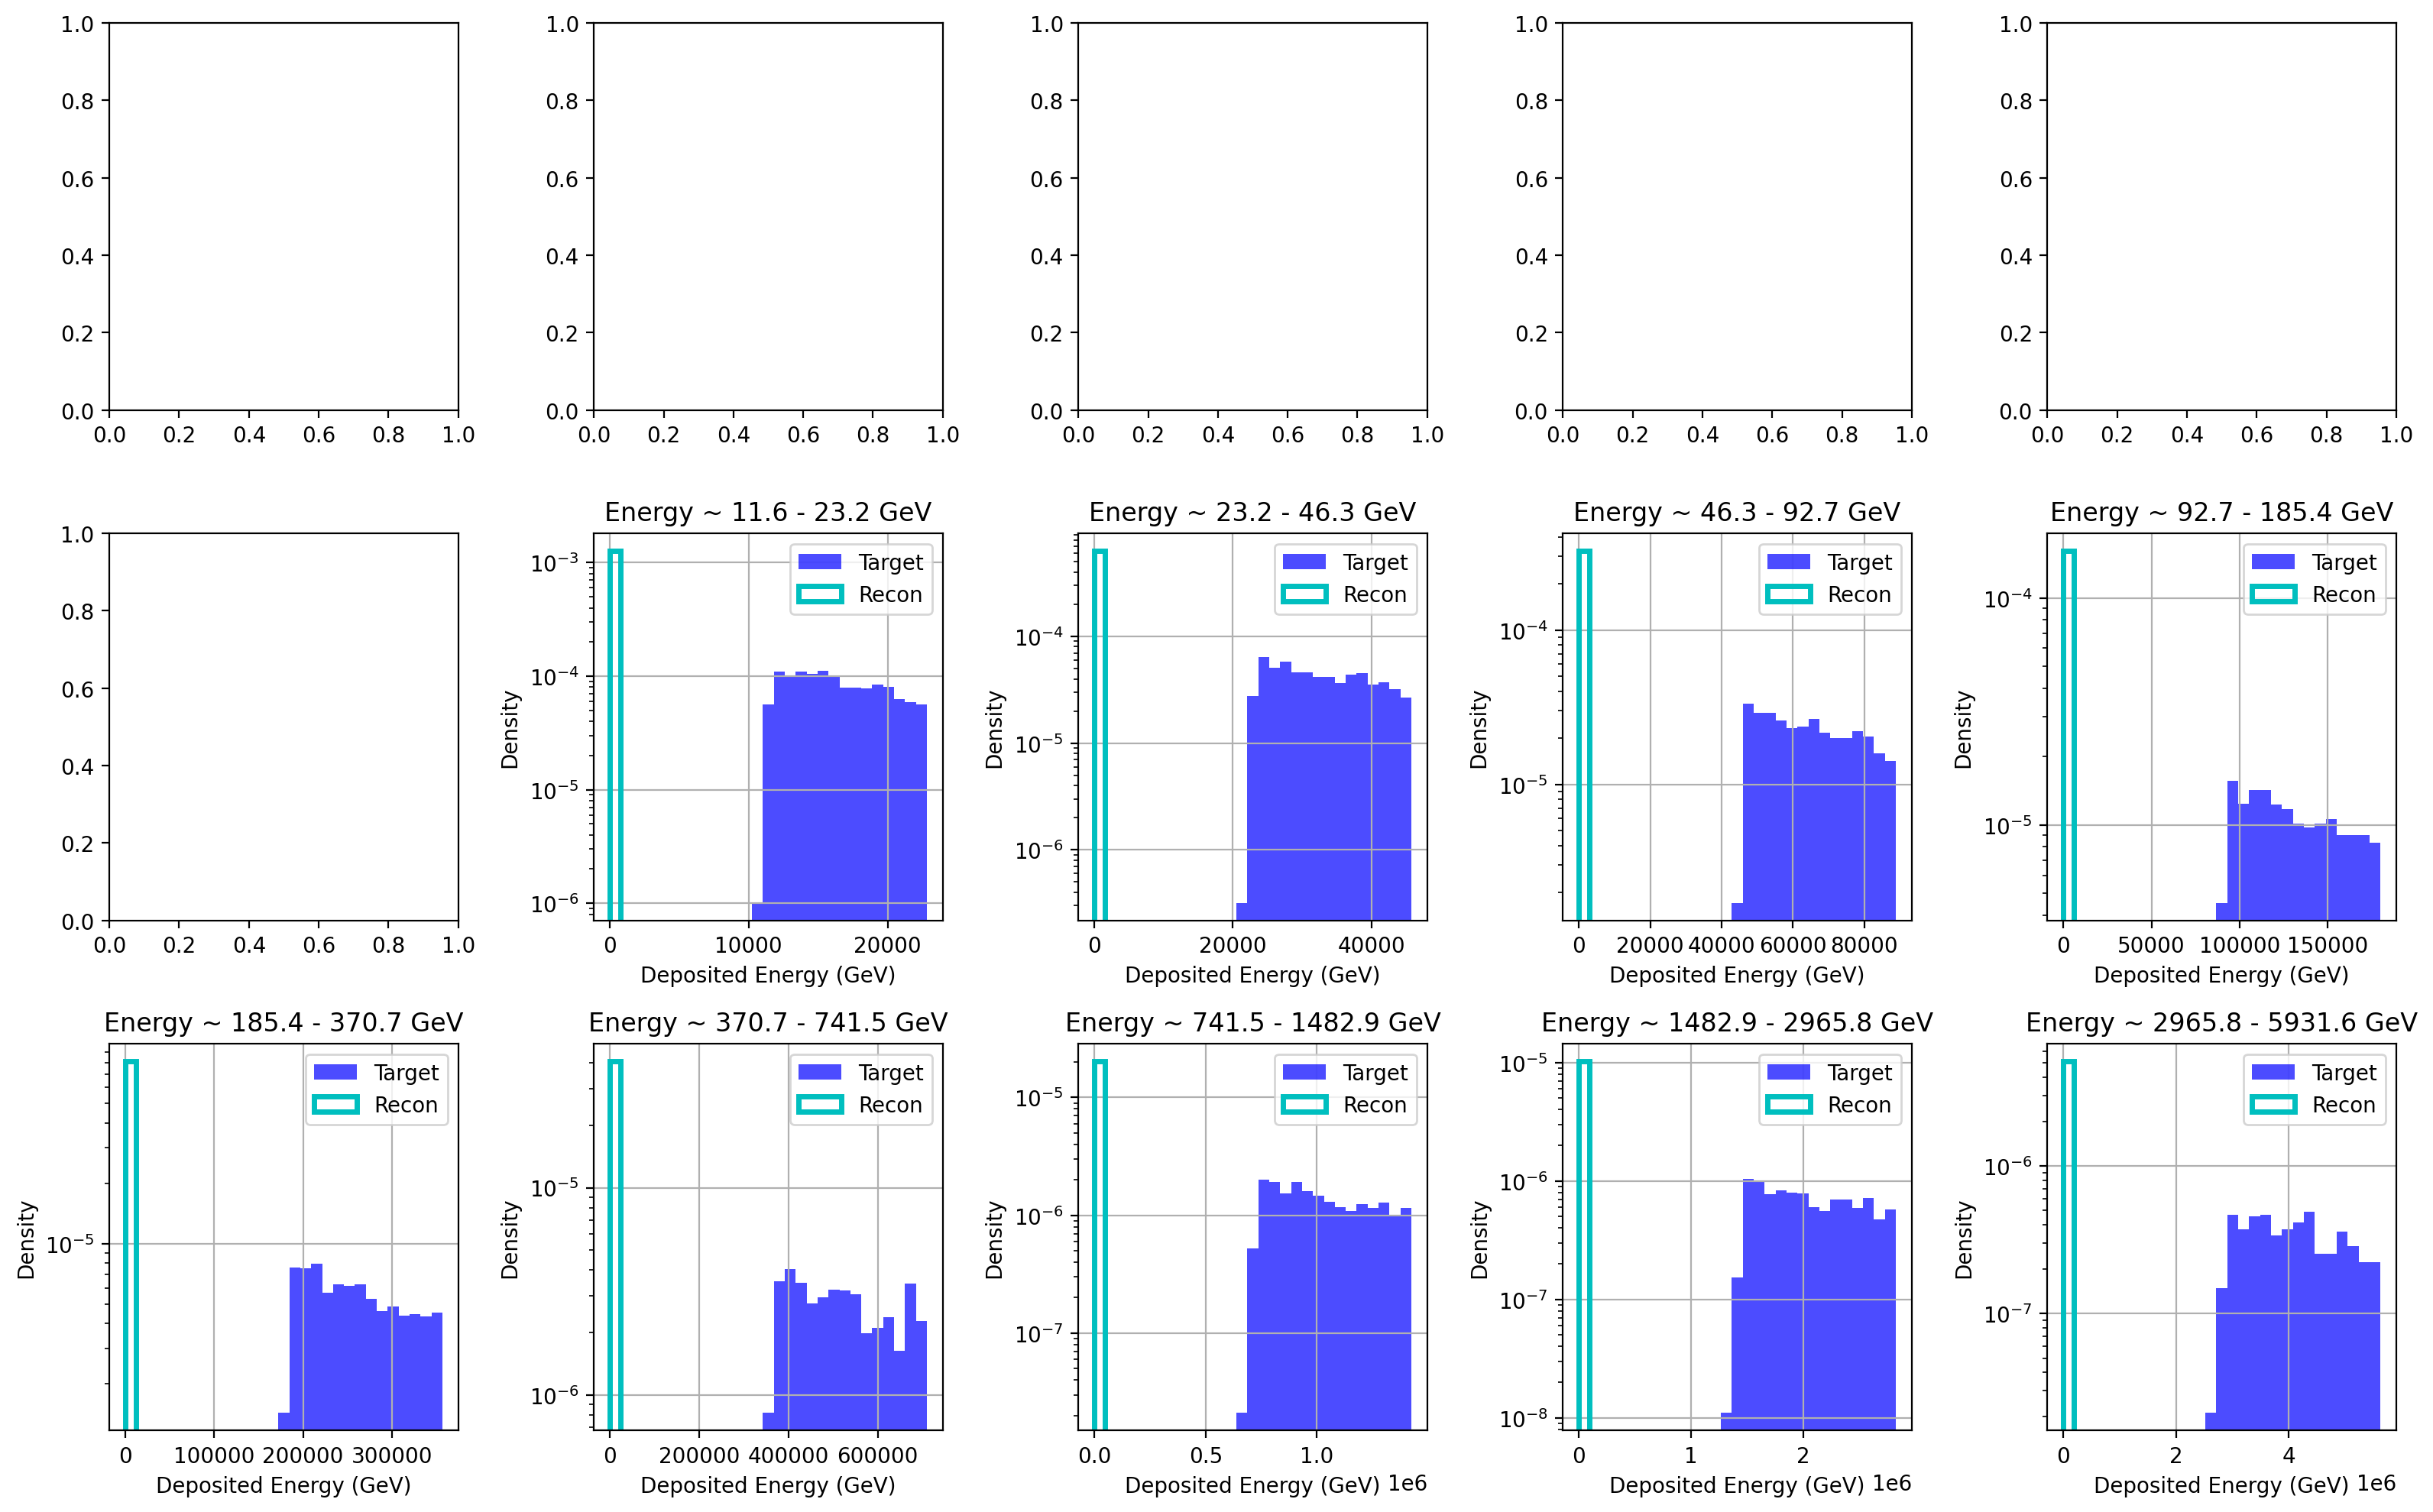

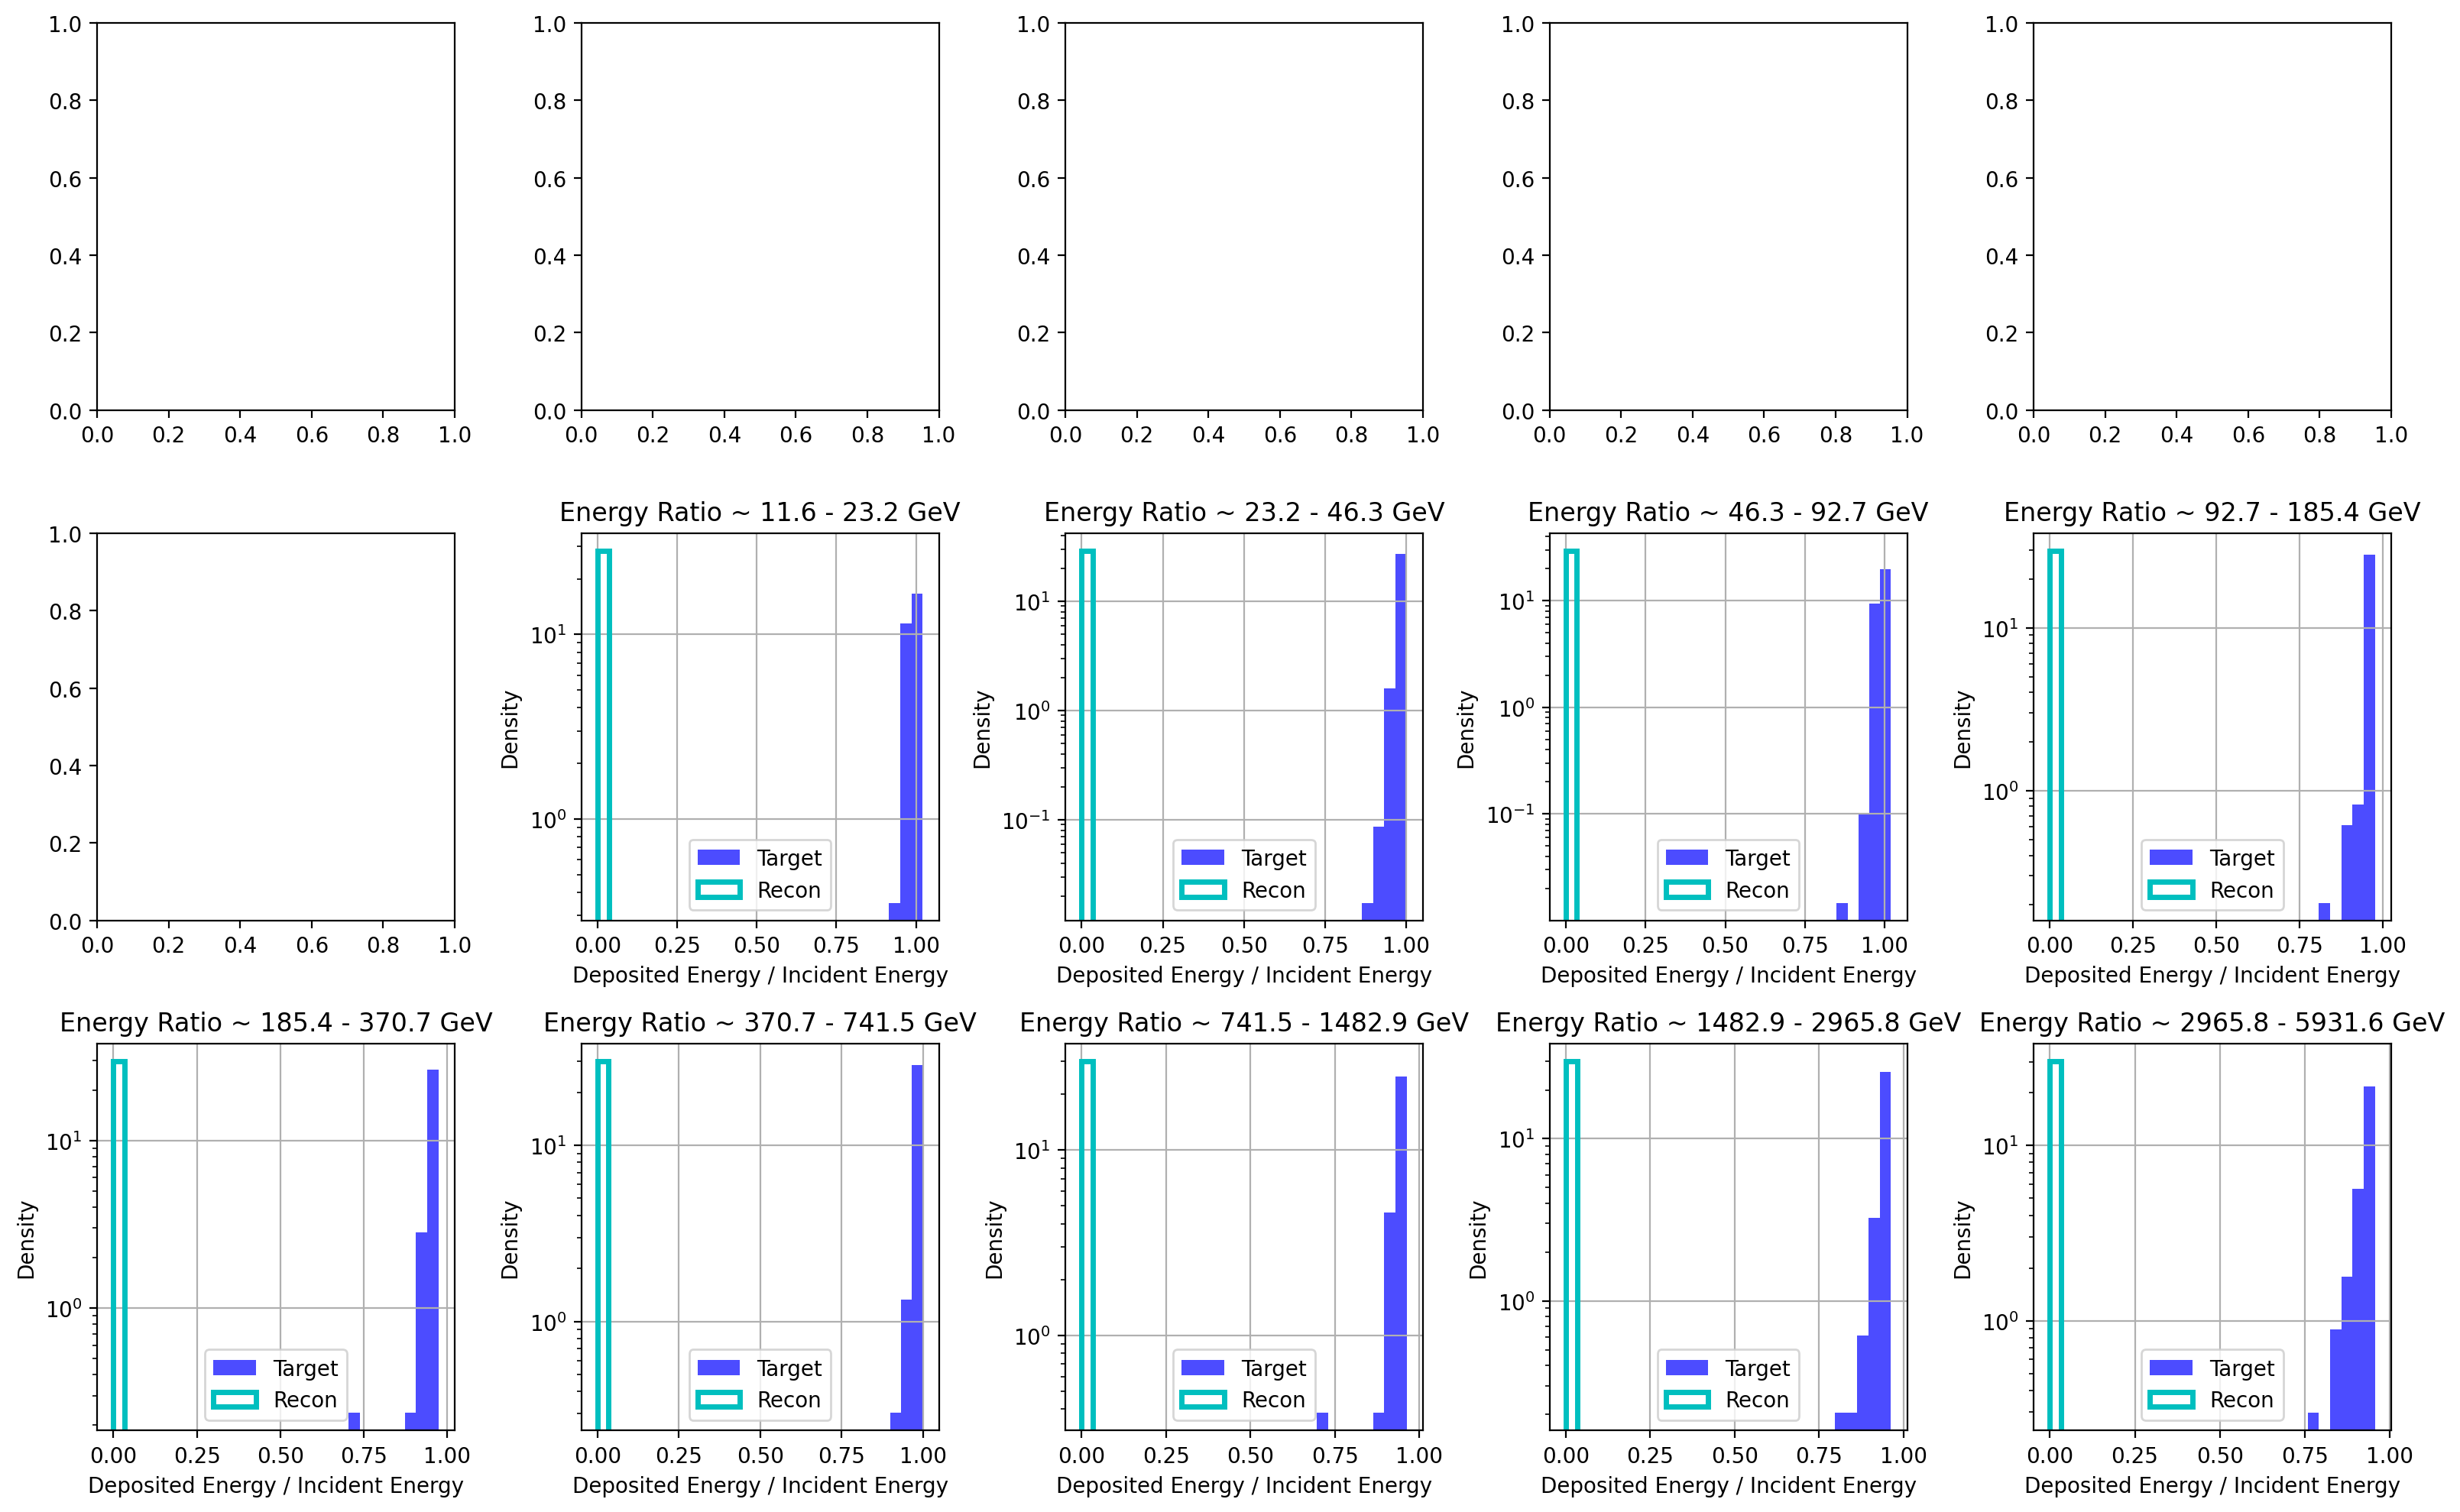

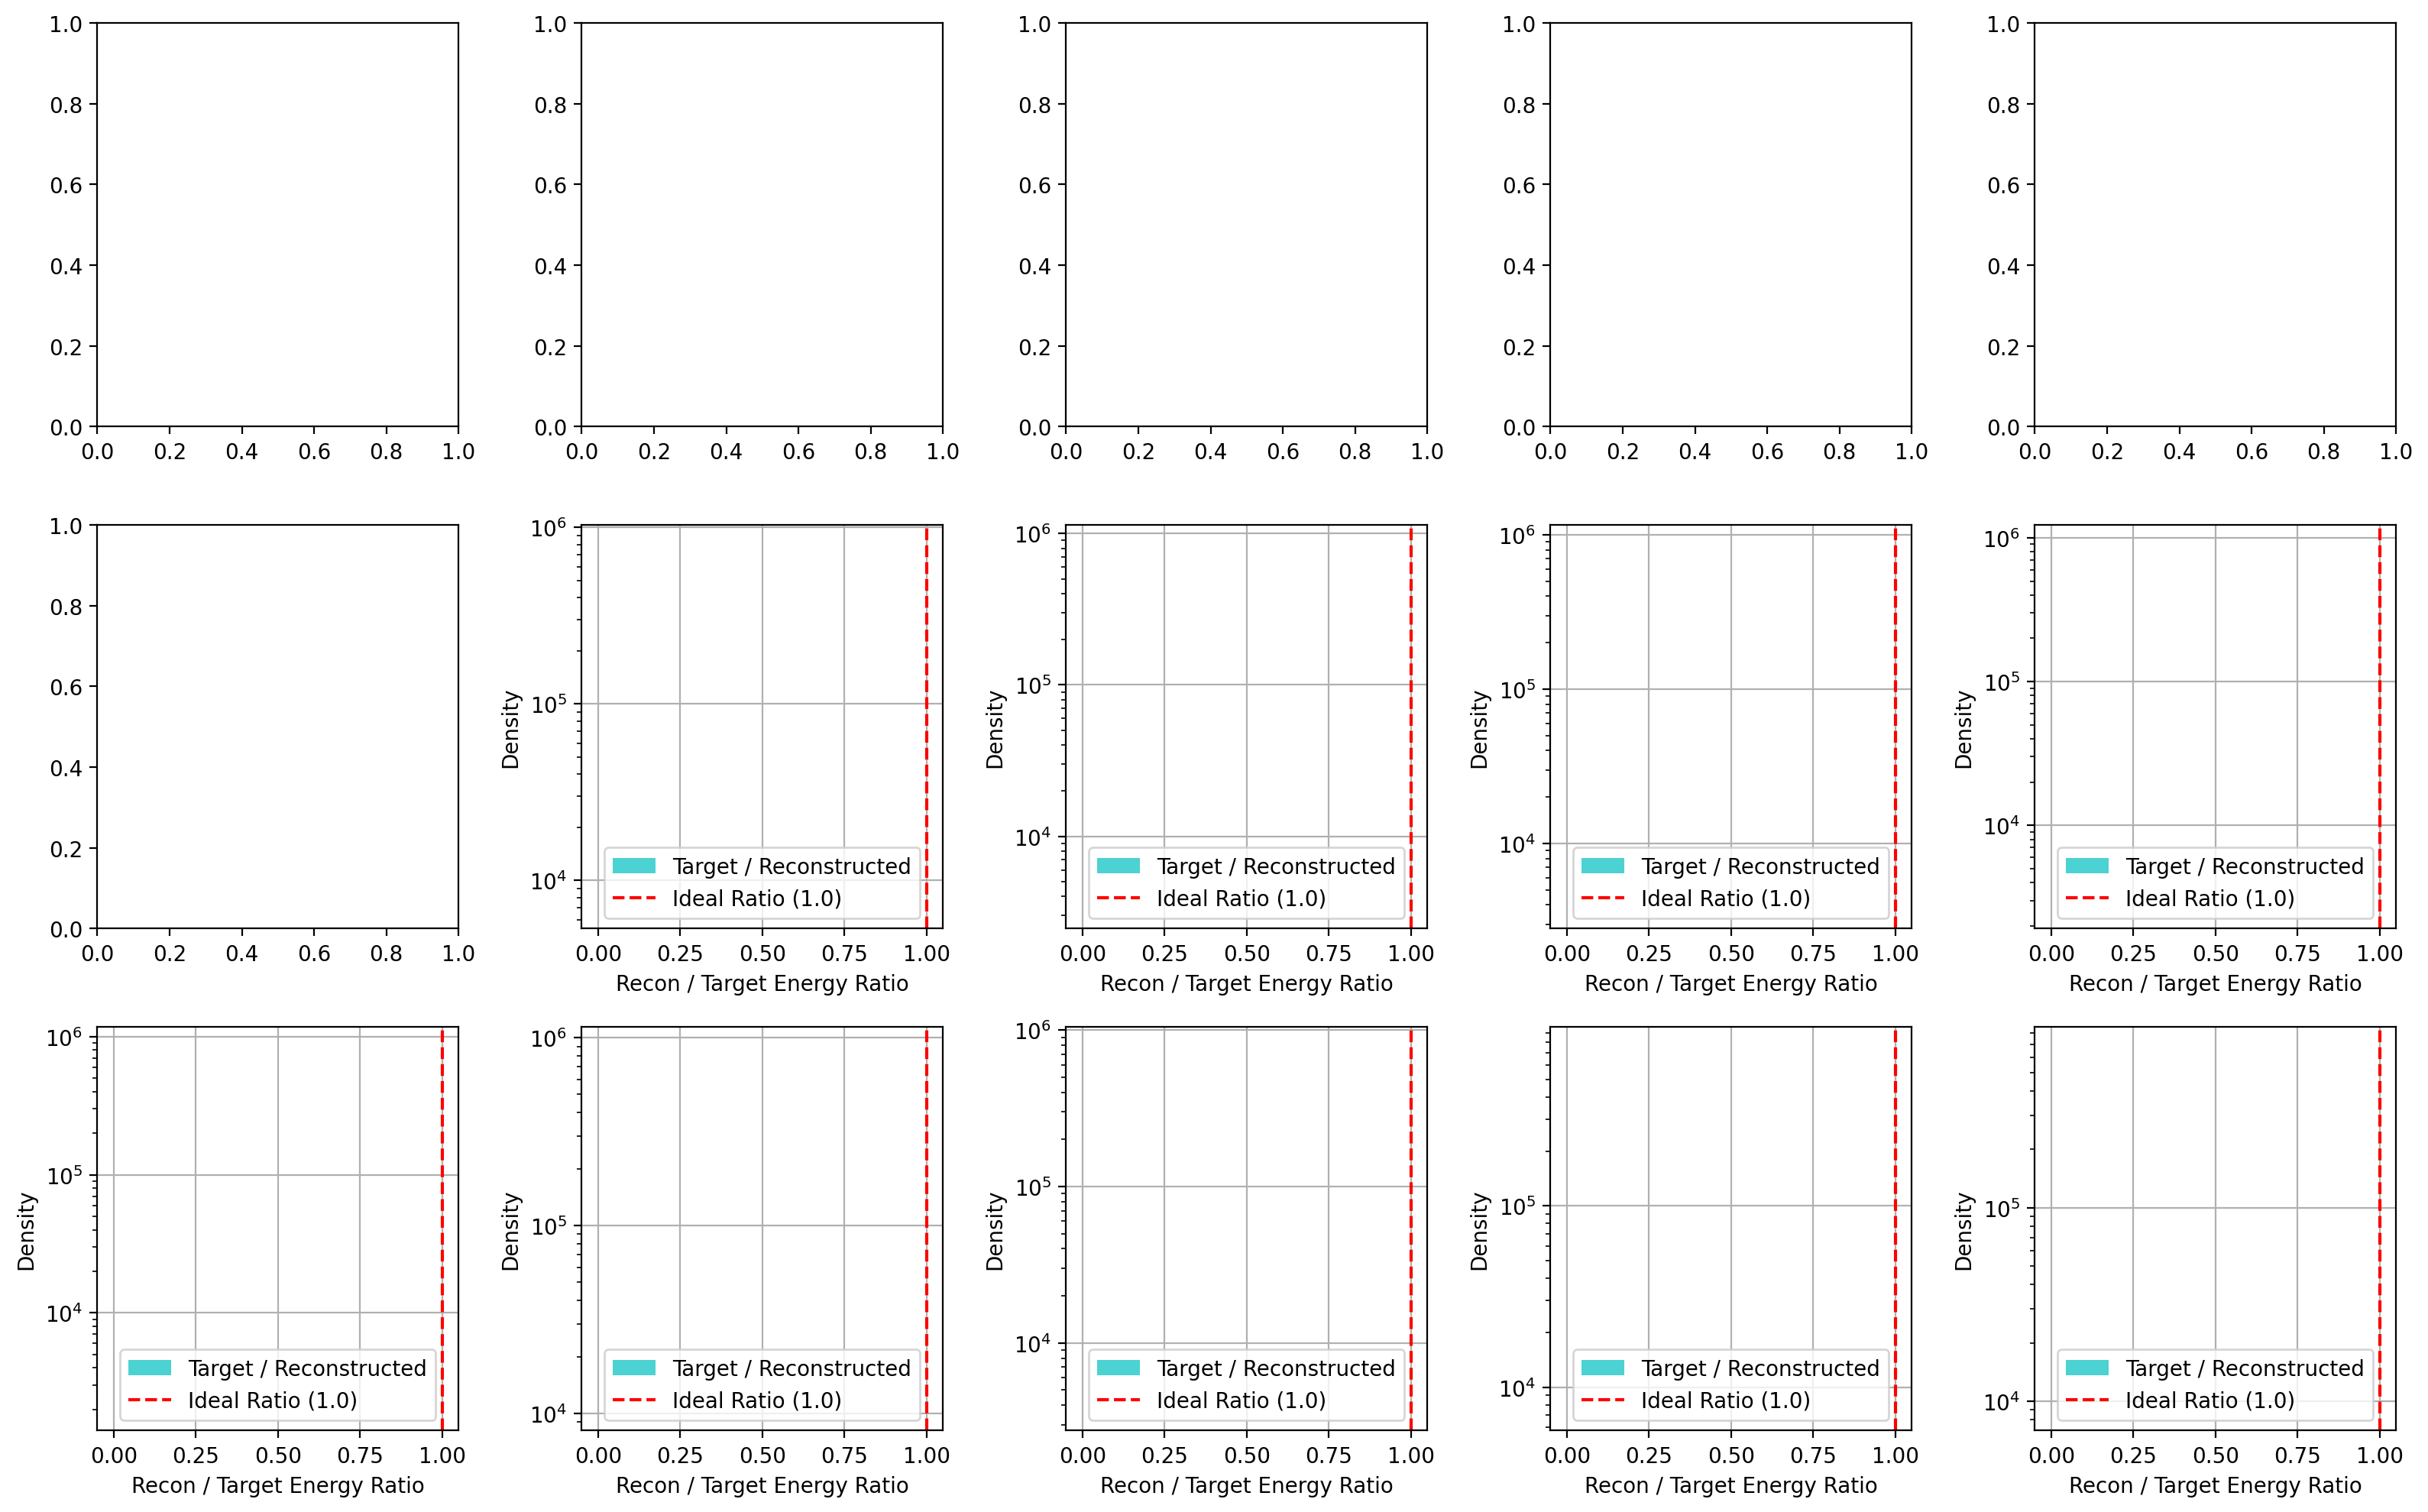

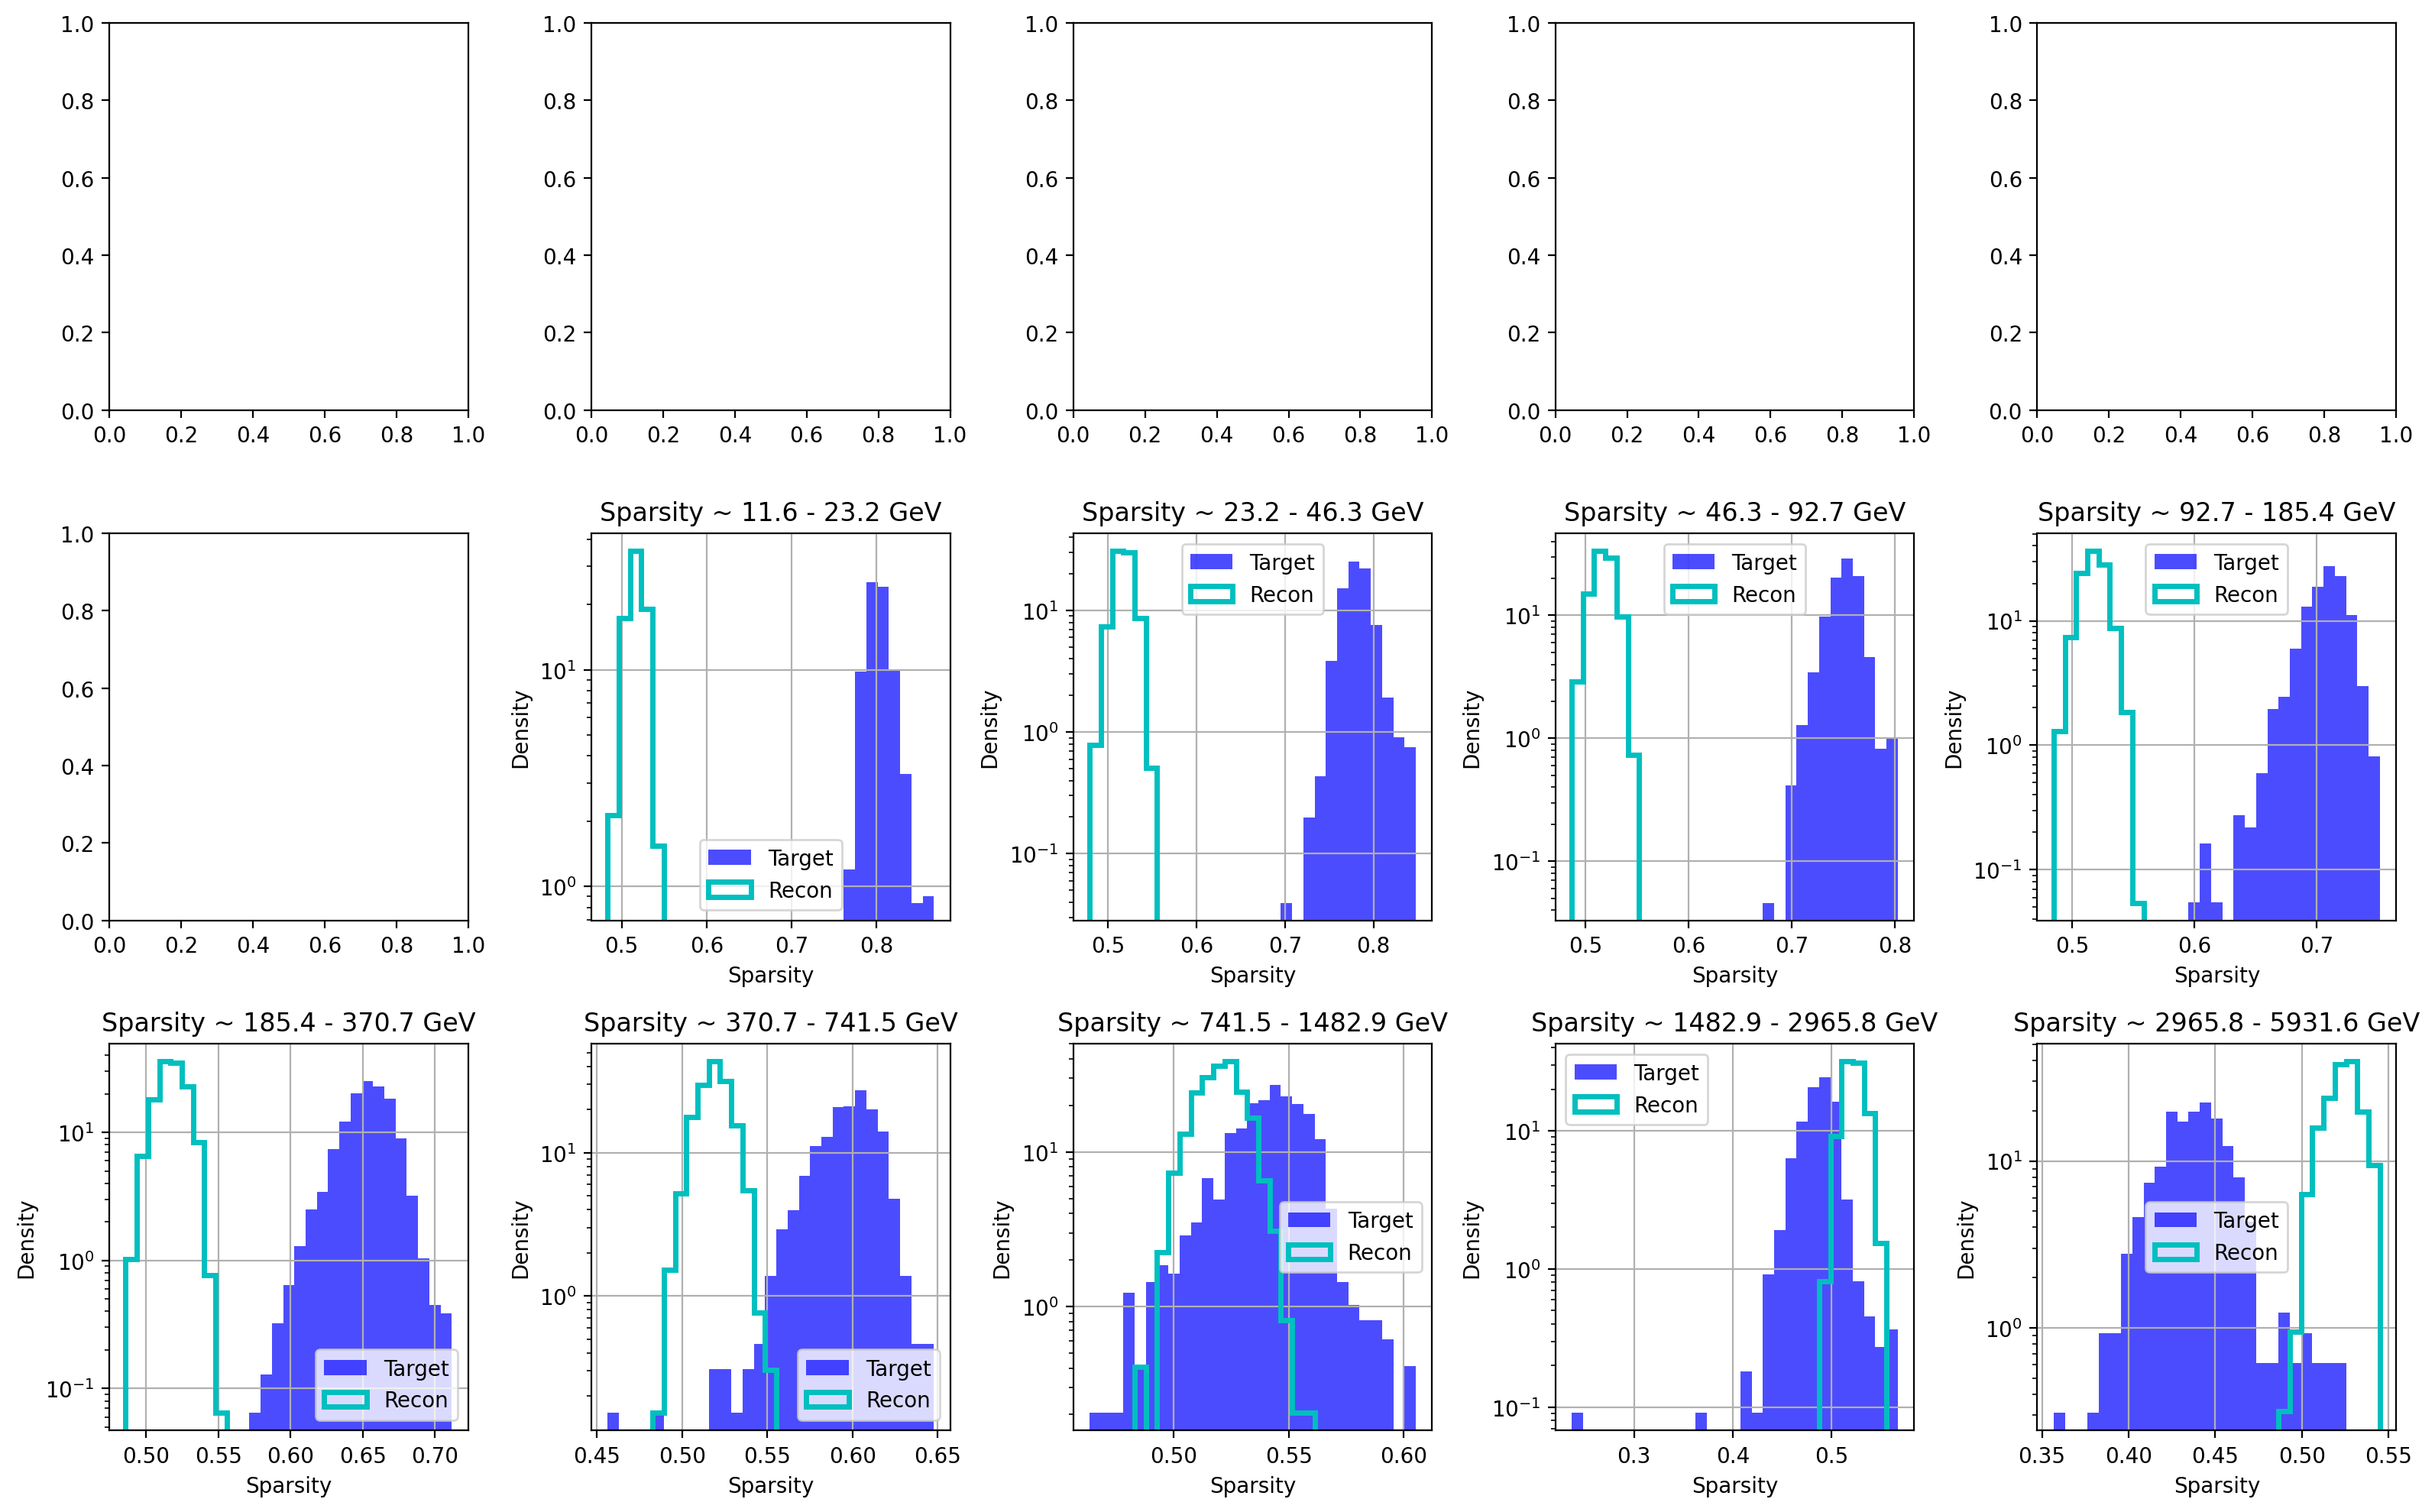

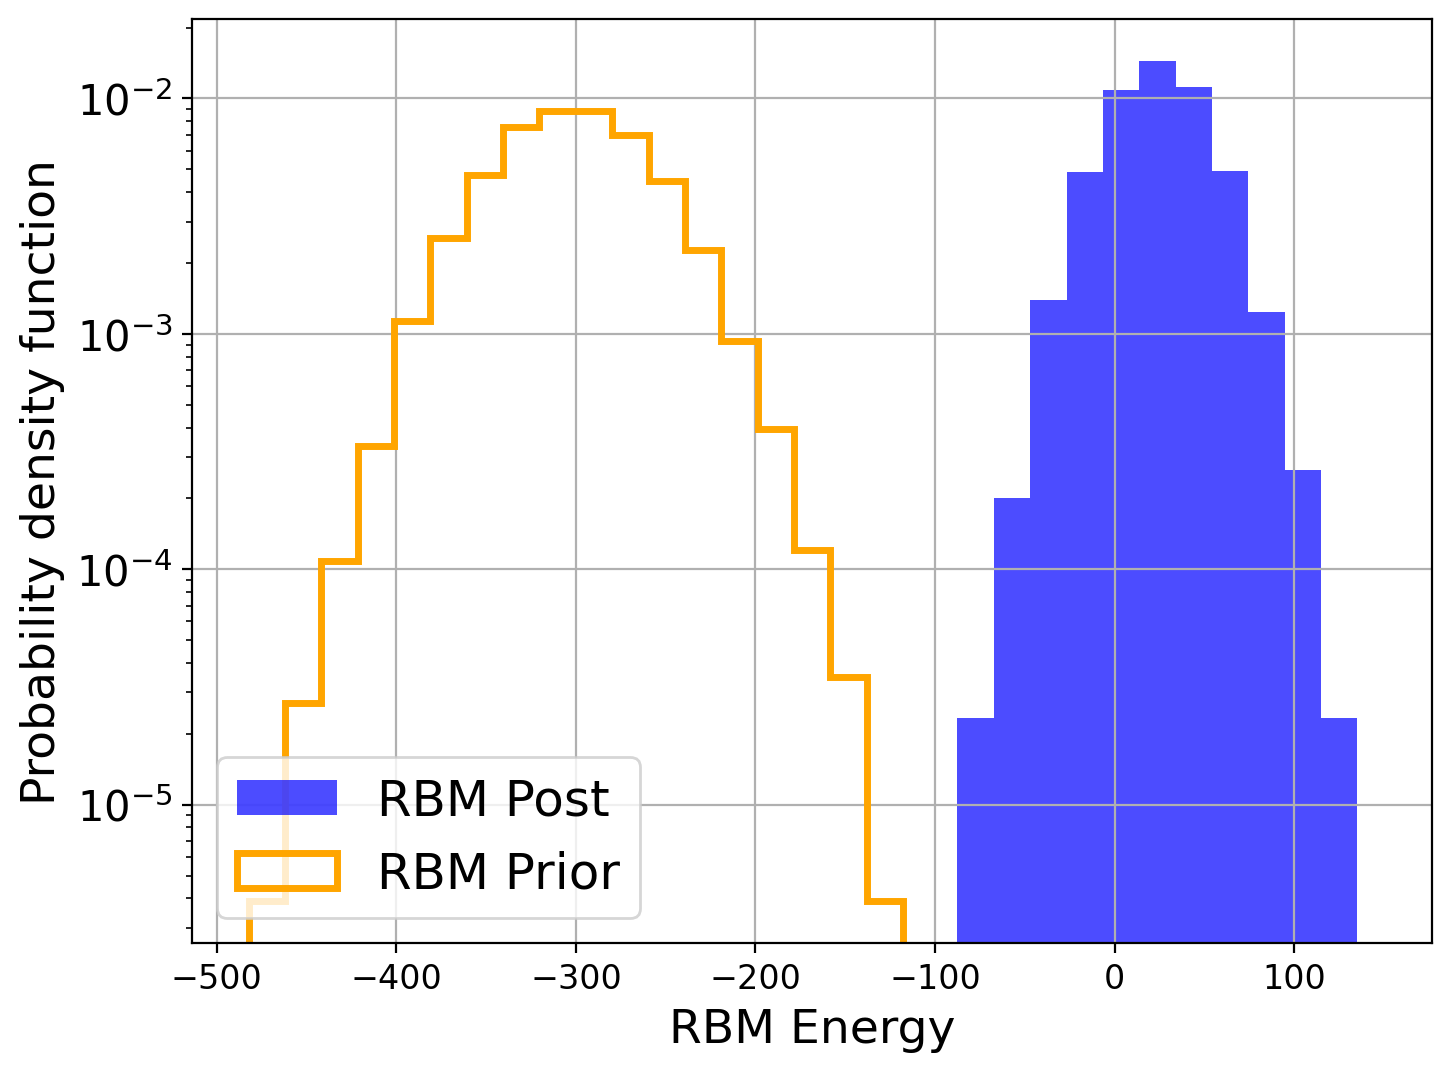

In [12]:
self.evaluate(self.data_mgr.test_loader, 0)

(array([7578., 1827., 1179.,  787.,  634.,  181.,  158.,  147.,  120.,
         115.]),
 array([  181.03575134,  2477.90551758,  4774.77490234,  7071.64453125,
         9368.51464844, 11665.38378906, 13962.25390625, 16259.12304688,
        18555.9921875 , 20852.86328125, 23149.73242188]),
 <BarContainer object of 10 artists>)

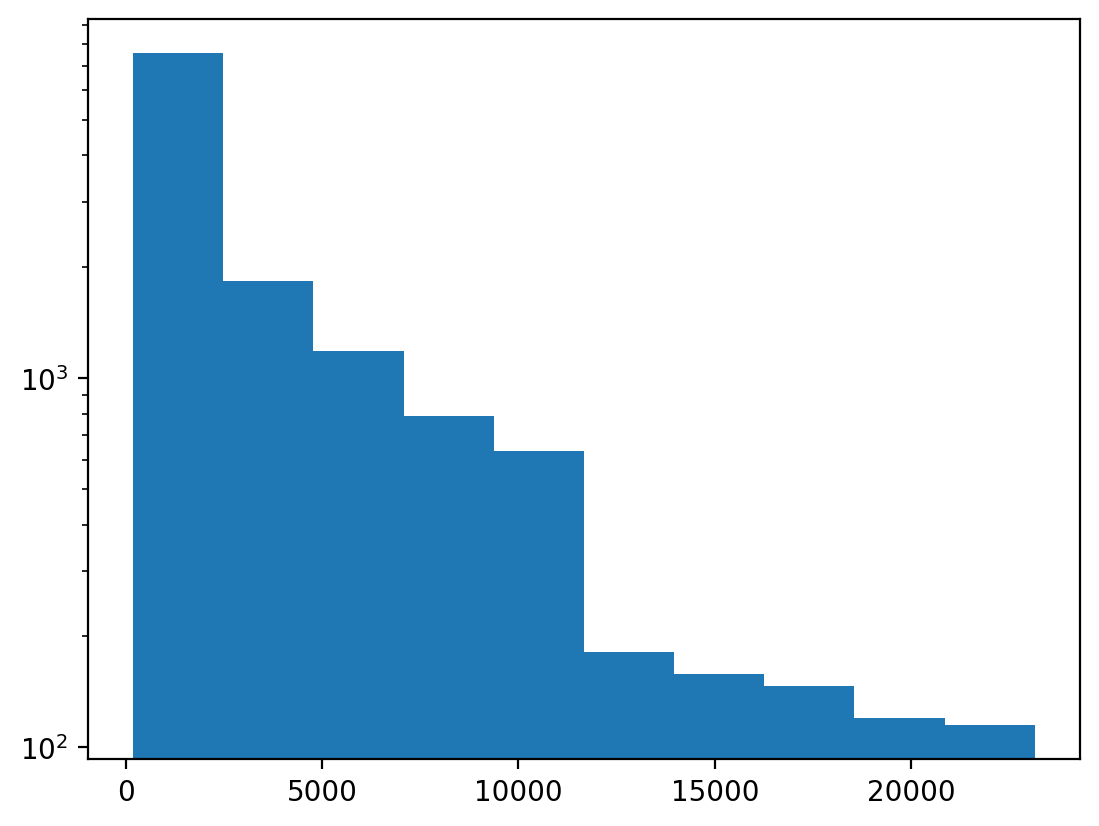

In [ ]:
plt.hist(self.incident_energy.numpy(), log=True)

(array([9957.,  988.,  572.,  380.,  333.,  124.,  116.,  105.,   89.,
          64.]),
 array([  11587.52929688,  603240.25      , 1194893.        ,
        1786545.75      , 2378198.5       , 2969851.25      ,
        3561504.        , 4153156.75      , 4744809.5       ,
        5336462.5       , 5928115.        ]),
 <BarContainer object of 10 artists>)

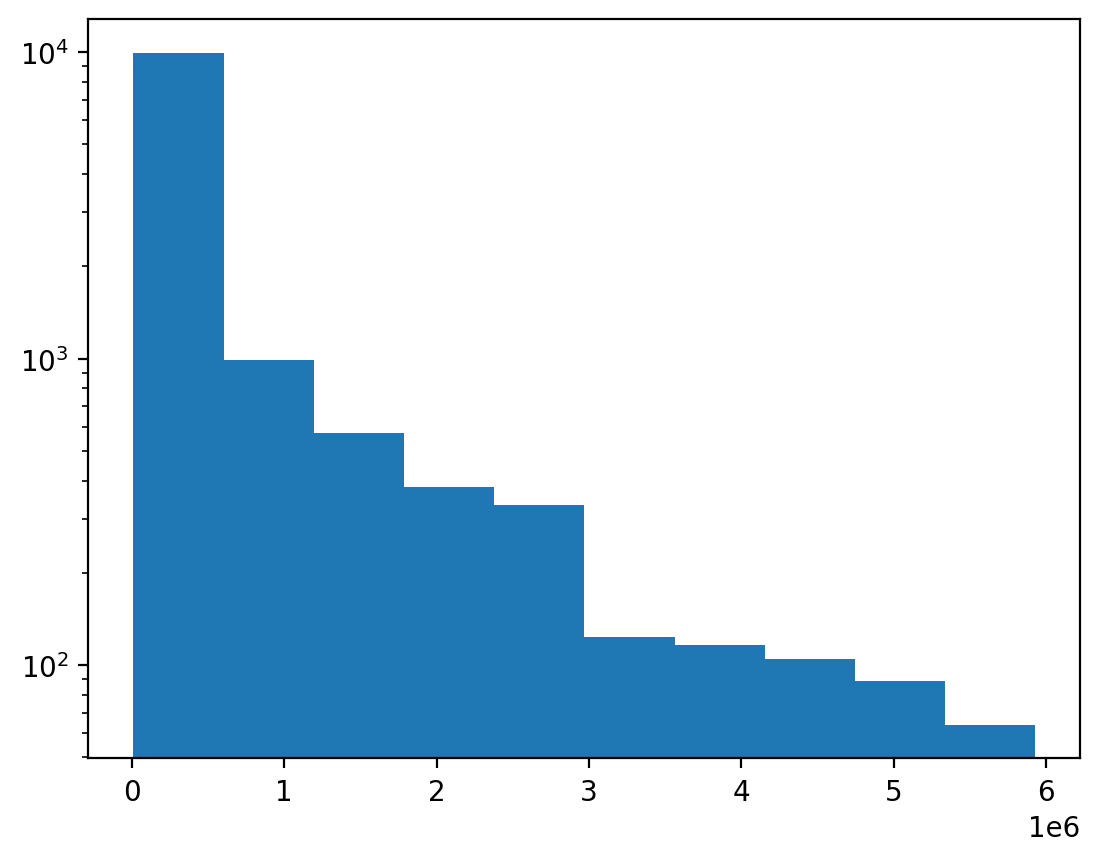

In [13]:
plt.hist(self.incident_energy.numpy(), log=True)

In [14]:
self.incident_energy.numpy()

array([[  16536.078],
       [  19075.545],
       [  13579.2  ],
       ...,
       [3224388.8  ],
       [3532379.5  ],
       [5196590.5  ]], dtype=float32)

In [8]:
# vae_plots(self.incident_energy, self.showers, self.showers_recon)

In [12]:
self.fit(0)

/usr/local/lib/python3.12/dist-packages/torch/_tensor.py:1128: UserWarning:

Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /opt/pytorch/pytorch/aten/src/ATen/native/Scalar.cpp:22.)

[21:44:38.315] INFO   engine.engine                                     Epoch: 0 [0/796 (0%)]	 beta: 1.000, slope: 0.050 	 Batch Loss: 41711.0547
[21:55:59.832] INFO   engine.engine                                     Epoch: 0 [79/796 (10%)]	 beta: 1.000, slope: 0.050 	 Batch Loss: 3001.2837


KeyboardInterrupt: 